In [69]:
import pandas as pd
from logging import root
from PIL import Image
import numpy as np
import sys
import os
import csv
from matplotlib import pyplot
import tensorflow as tf 
from keras import layers 
from keras.callbacks import *
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
import logging, os

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [70]:

image_size = (64, 64)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/ajones/Documents/asl/ASL_database/ASL_database_train/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/ajones/Documents/asl/ASL_database/ASL_database_train/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2637 files belonging to 26 classes.
Using 2110 files for training.
Found 2637 files belonging to 26 classes.
Using 527 files for validation.


In [76]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Dropout(.1))
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(.2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization_127 (Ba  (None, 62, 62, 64)       256       
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 62, 62, 64)        0         
                                                                 
 conv2d_88 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization_128 (Ba  (None, 60, 60, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 30, 30, 64)     

In [ ]:
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
hist = model.fit(train_ds, epochs = 12, batch_size = 64, validation_data=val_ds)

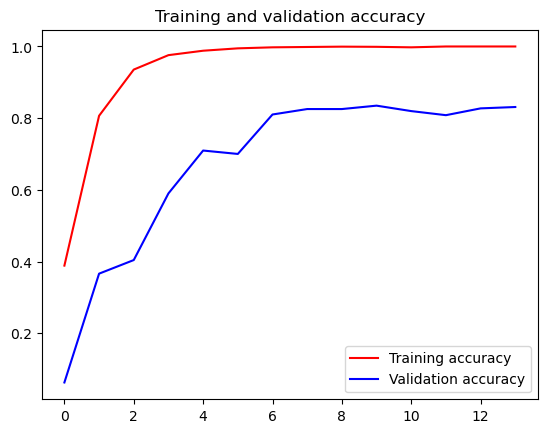

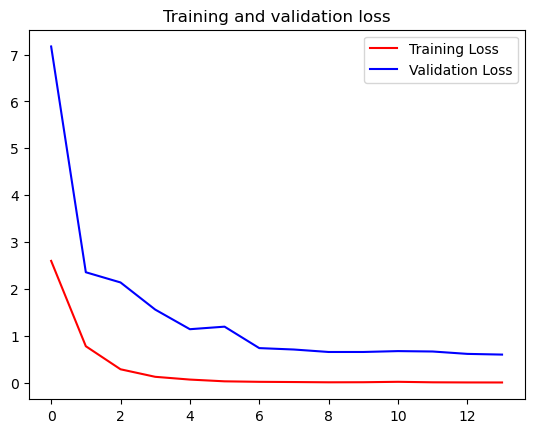

In [78]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']

epochs = range(len(acc))

pyplot.plot(epochs, acc, 'r', label='Training accuracy') 
pyplot.plot(epochs, val_acc, 'b', label='Validation accuracy') 
pyplot.title('Training and validation accuracy') 
pyplot.legend() 
pyplot.figure()

pyplot.plot(epochs, loss, 'r', label='Training Loss') 
pyplot.plot(epochs, val_loss, 'b', label='Validation Loss') 
pyplot.title('Training and validation loss') 
pyplot.legend()

pyplot.show()

In [63]:
model.save('./asl_model')